## Import library

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Understanding

In [2]:
##Read data
df = pd.read_csv("city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
#Check the number of rows and column of the df set
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 29531
Number of columns: 16


In [4]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
#Check duplicated data
df.duplicated().sum()

0

In [7]:
## Show missing value
# Check the sum of null data in each column
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


Skewness of numeric features:


Benzene    21.304218
Toluene    11.666129
CO          8.878322
Xylene      7.891515
NH3         4.083993
SO2         4.083660
NO          3.883166
AQI         3.396757
PM2.5       3.369960
NOx         2.569915
NO2         2.464560
PM10        2.053189
O3          1.330119
dtype: float64

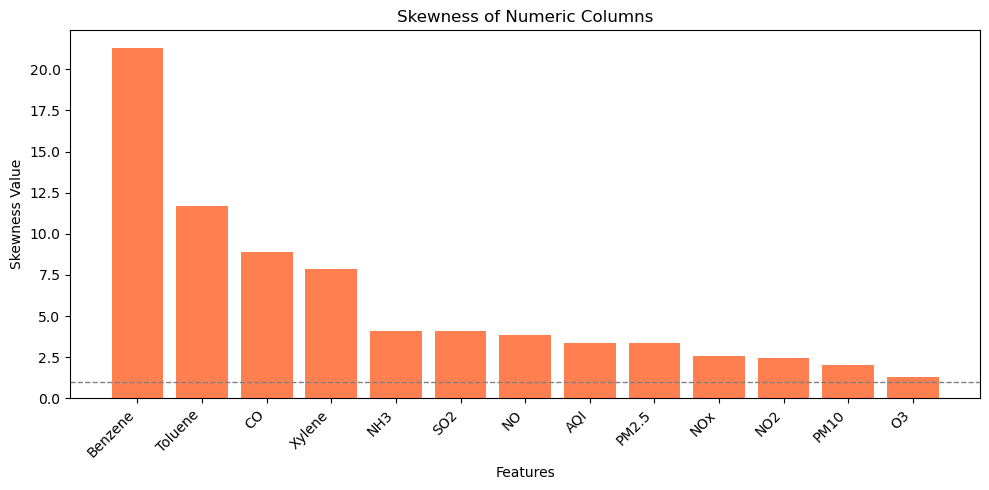

In [9]:
#check skewness
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# Calculate skewness
skewness = df[numeric_cols].skew().sort_values(ascending=False)

# Display as a table
print("Skewness of numeric features:")
display(skewness)

# ----- Plot Skewness Bar Graph -----
plt.figure(figsize=(10,5))
plt.bar(skewness.index, skewness.values, color='coral')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1)
plt.title('Skewness of Numeric Columns')
plt.xlabel('Features')
plt.ylabel('Skewness Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
# Create a helper table showing the imputation recommendation
skew_table = pd.DataFrame({
    'Feature': skewness.index,
    'Skewness': skewness.values,
    'Distribution': ['Right-Skewed' if val > 1 else 'Approx. Normal' for val in skewness.values],
    'Recommended Imputation': ['Median' if val > 1 else 'Mean' for val in skewness.values]
})
display(skew_table)

,Feature,Skewness,Distribution,Recommended Imputation
0,Benzene,21.304218,Right-Skewed,Median
1,Toluene,11.666129,Right-Skewed,Median
2,CO,8.878322,Right-Skewed,Median
3,Xylene,7.891515,Right-Skewed,Median
4,NH3,4.083993,Right-Skewed,Median
5,SO2,4.083660,Right-Skewed,Median
6,NO,3.883166,Right-Skewed,Median
7,AQI,3.396757,Right-Skewed,Median
8,PM2.5,3.369960,Right-Skewed,Median
9,NOx,2.569915,Right-Skewed,Median


In [11]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object', name='City')


## Data Preprocessing and Data Cleaning

In [12]:
## handle missing value
# 61% missing → not reliable
df = df.drop(columns=['Xylene'])   

# Drop rows where target variable AQI is missing
df = df.dropna(subset=['AQI'])


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

In [14]:
# Numeric pollutant columns
num_cols = [c for c in ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']
            if c in df.columns]

# Grouped median imputation (City + Month)
group_median = df.groupby(['City','Month'])[num_cols].transform('median')
df[num_cols] = df[num_cols].fillna(group_median)

# Fill any remaining missing values with global median
global_median = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(global_median)

In [ ]:
# --- Outlier Handling (simple & effective) ---
#for city, sub in df.groupby('City'):
#    for c in ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']:
#        q1, q99 = sub[c].quantile([0.01, 0.99])
#        mask = df['City'] == city
#        df.loc[mask, c] = df.loc[mask, c].clip(q1, q99)

#print("✅ Outliers capped between 1st and 99th percentile for each city.")


Numeric pollutant columns: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']
✅ Outliers capped between 1st and 99th percentile per city.


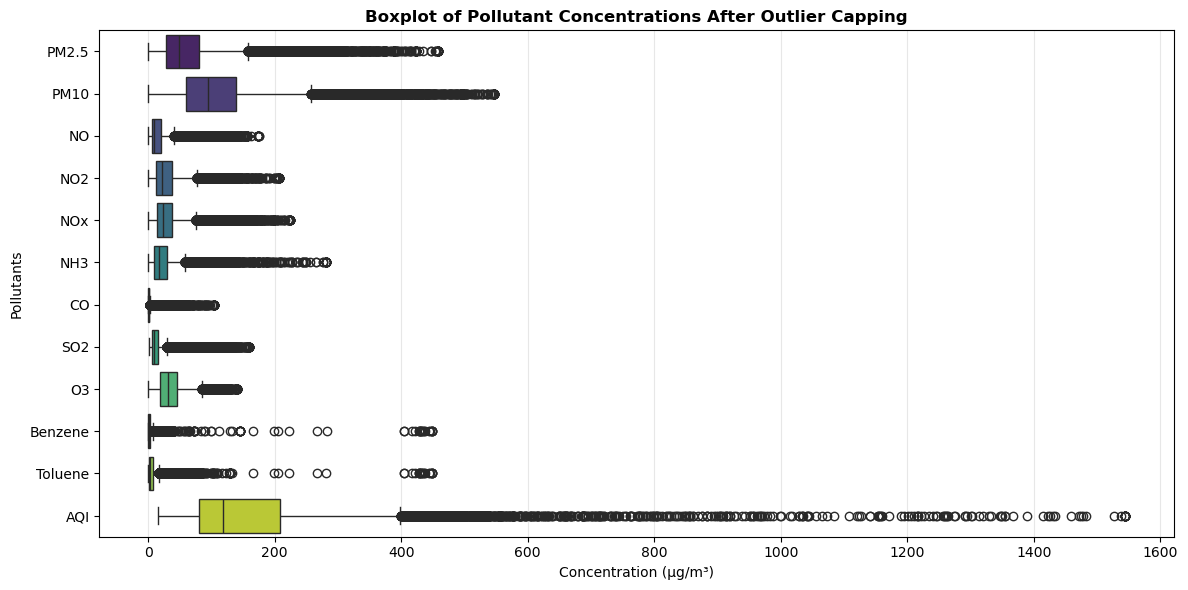

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4632\955915254.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Capped_Values', data=outlier_summary, palette='crest')


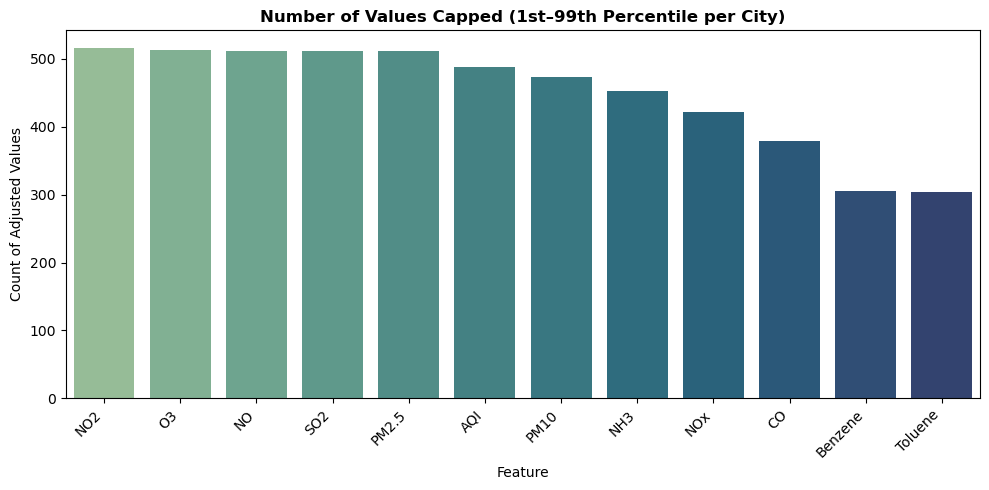

    Feature  Capped_Values
3       NO2            516
8        O3            513
2        NO            512
7       SO2            512
0     PM2.5            511
11      AQI            488
1      PM10            473
5       NH3            453
4       NOx            421
6        CO            379
9   Benzene            305
10  Toluene            304


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Identify numeric pollutant columns (excluding non-numeric)
num_cols = [c for c in df.columns if c not in ['City','Date','AQI_Bucket','Month','Year','Day','Season']
            and pd.api.types.is_numeric_dtype(df[c])]

print(f"Numeric pollutant columns: {num_cols}")

# --- Outlier Capping (1st–99th percentile per City) ---
df_capped = df.copy()
total_capped = {col: 0 for col in num_cols}

for city, sub in df_capped.groupby('City'):
    for c in num_cols:
        q1, q99 = sub[c].quantile([0.01, 0.99])
        mask = df_capped['City'] == city
        before_vals = df_capped.loc[mask, c].copy()
        df_capped.loc[mask, c] = df_capped.loc[mask, c].clip(q1, q99)
        total_capped[c] += (before_vals != df_capped.loc[mask, c]).sum()

print("✅ Outliers capped between 1st and 99th percentile per city.")

# --- Single boxplot for each pollutant ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_capped[num_cols], orient='h', palette='viridis')
plt.title('Boxplot of Pollutant Concentrations After Outlier Capping', fontweight='bold')
plt.xlabel('Concentration (µg/m³)')
plt.ylabel('Pollutants')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Summary Bar Chart: Number of Values Capped ---
outlier_summary = pd.DataFrame({
    'Feature': list(total_capped.keys()),
    'Capped_Values': list(total_capped.values())
}).sort_values('Capped_Values', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Capped_Values', data=outlier_summary, palette='crest')
plt.title('Number of Values Capped (1st–99th Percentile per City)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of Adjusted Values')
plt.tight_layout()
plt.show()

print(outlier_summary)


# Exploratory Data Analysis

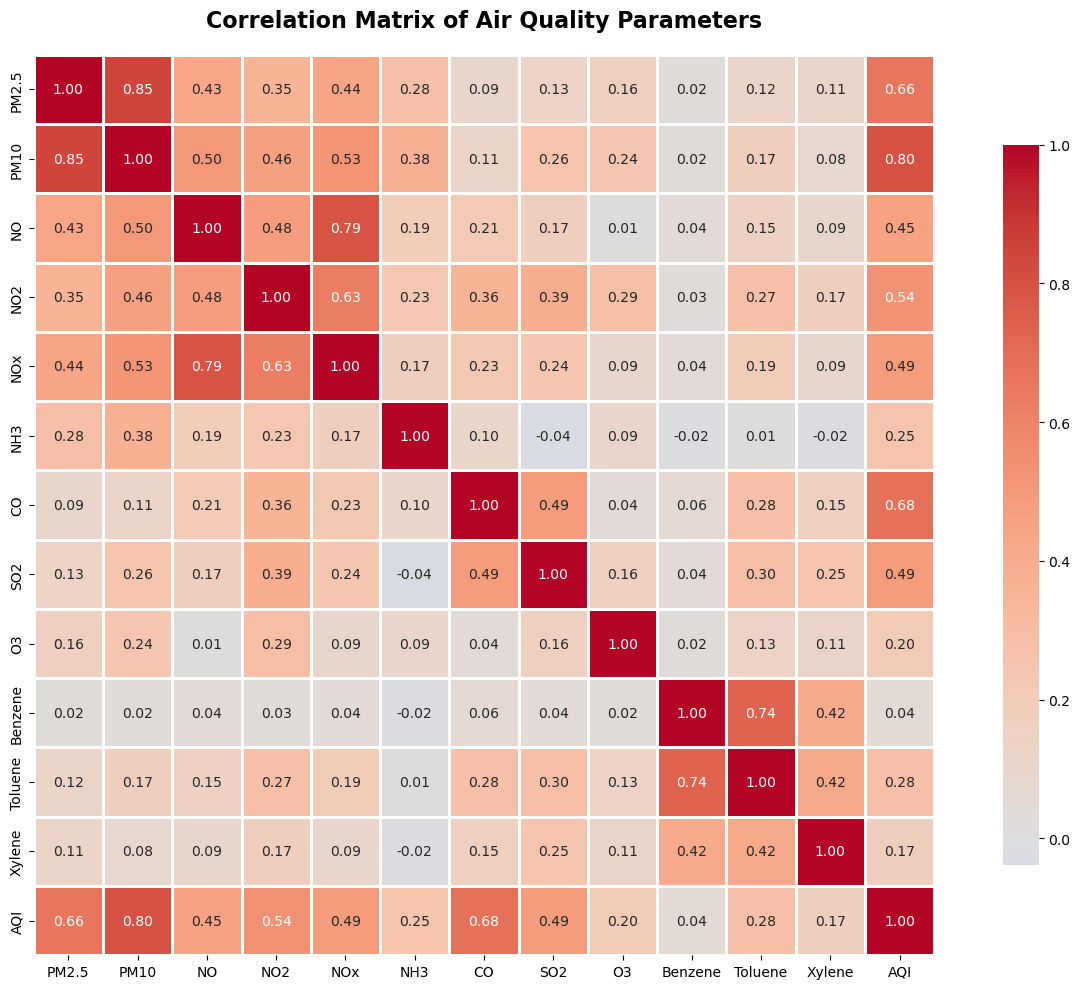


Correlation with AQI:
PM10       0.803313
CO         0.683346
PM2.5      0.659181
NO2        0.537071
SO2        0.490586
NOx        0.486450
NO         0.452191
Toluene    0.279992
NH3        0.252019
O3         0.198991
Name: AQI, dtype: float64


In [ ]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Air Quality Parameters', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Show strong correlations with AQI
if 'AQI' in correlation_matrix.columns:
    aqi_corr = correlation_matrix['AQI'].sort_values(ascending=False)
    print("\nCorrelation with AQI:")
    print(aqi_corr[1:11])

In [ ]:
# Select features based on correlation analysis
selected_features = ['PM10','CO',"PM2.5",'NO2','SO2','NOx','NO','Toluene','NH3','O3']

# Define X and y
X = df[selected_features]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:     {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train-test split and Normalization